In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt

from nltk import word_tokenize

from tqdm import tqdm

In [2]:
data = pd.read_csv("/kaggle/input/name-entity-recognition-ner-dataset/NER dataset.csv", encoding='latin1')
data = data.fillna(method="ffill") # Deal with N/A"

In [3]:
data.head()

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O


In [4]:
tags = list(set(data.POS.values)) #Read POS values
tags #List of possible POS values

['NNS',
 ':',
 'VBD',
 'DT',
 'PDT',
 '$',
 'RBR',
 'RBS',
 'WP',
 'VBZ',
 '``',
 'RB',
 'MD',
 'VB',
 'VBP',
 'JJ',
 'NN',
 'CC',
 'WP$',
 'NNPS',
 'LRB',
 'RRB',
 'EX',
 'TO',
 'WRB',
 'PRP$',
 'PRP',
 'WDT',
 'FW',
 ';',
 'VBN',
 'CD',
 'JJR',
 'UH',
 ',',
 'POS',
 'JJS',
 'VBG',
 'IN',
 'RP',
 'NNP',
 '.']

In [5]:
#Creating the dictionary and displaying the 1st 20 words
words = list(set(data.Word.values))
np.array(words[:20]).flatten() 

array(['existence', 'al-Douri', 'Initiative', 'Mich.-based',
       'Archaeologist', 'Yuganskeneftegaz', 'violence-torn', 'seven-year',
       'Changqi', 'depleted', 'Blumenthal', 'Morris', 'Narayan', 'flour',
       'Longwang', 'justification', 'trimming', 'Craig', 'Return',
       'roller'], dtype='<U16')

In [6]:
#adding the word dummy to dictionary so that we can pad sentences.
words.append('dummy')

In [7]:
#Creating a class to read senteces

class read_sentences():
    
    def __init__(self,data):
        self.data = data
        agg_func = lambda s: [(w,p,t) for w, p, t in zip(s["Word"].values.tolist(),
                                                           s["POS"].values.tolist(),
                                                           s["Tag"].values.tolist())]
        self.grouped = self.data.groupby("Sentence #").apply(agg_func)
        self.sentences = [s for s in self.grouped]

In [8]:
sentences = read_sentences(data).sentences

In [9]:
# Convert words and tags into numbers
word2id = {w: i for i, w in enumerate(words)}
tag2id = {t: i for i, t in enumerate(tags)}

In [10]:
word2id

{'existence': 0,
 'al-Douri': 1,
 'Initiative': 2,
 'Mich.-based': 3,
 'Archaeologist': 4,
 'Yuganskeneftegaz': 5,
 'violence-torn': 6,
 'seven-year': 7,
 'Changqi': 8,
 'depleted': 9,
 'Blumenthal': 10,
 'Morris': 11,
 'Narayan': 12,
 'flour': 13,
 'Longwang': 14,
 'justification': 15,
 'trimming': 16,
 'Craig': 17,
 'Return': 18,
 'roller': 19,
 'Geoffrey': 20,
 'Panzhihua': 21,
 'McCellan': 22,
 '65,000': 23,
 'Inequality': 24,
 'Fallujans': 25,
 'Bashir': 26,
 'Shyster': 27,
 'charitable': 28,
 'righteous': 29,
 'Georgetown': 30,
 'spectators': 31,
 'Researchers': 32,
 'Bakool': 33,
 'Gretchen': 34,
 'Haniyah': 35,
 'loudly': 36,
 'Scattered': 37,
 'candy': 38,
 'Djokovic': 39,
 'fostering': 40,
 'butcher': 41,
 'Floribert': 42,
 'enshrine': 43,
 'Kowal': 44,
 'Punxsutawney': 45,
 'Pakistani-ruled': 46,
 'gunpoint': 47,
 'Mason': 48,
 'write-downs': 49,
 '190': 50,
 'Ranbir': 51,
 'markets': 52,
 'Want': 53,
 'sayings': 54,
 'bias': 55,
 'Pork': 56,
 'al-Hindawi': 57,
 'Harnden': 5

In [11]:
tag2id

{'NNS': 0,
 ':': 1,
 'VBD': 2,
 'DT': 3,
 'PDT': 4,
 '$': 5,
 'RBR': 6,
 'RBS': 7,
 'WP': 8,
 'VBZ': 9,
 '``': 10,
 'RB': 11,
 'MD': 12,
 'VB': 13,
 'VBP': 14,
 'JJ': 15,
 'NN': 16,
 'CC': 17,
 'WP$': 18,
 'NNPS': 19,
 'LRB': 20,
 'RRB': 21,
 'EX': 22,
 'TO': 23,
 'WRB': 24,
 'PRP$': 25,
 'PRP': 26,
 'WDT': 27,
 'FW': 28,
 ';': 29,
 'VBN': 30,
 'CD': 31,
 'JJR': 32,
 'UH': 33,
 ',': 34,
 'POS': 35,
 'JJS': 36,
 'VBG': 37,
 'IN': 38,
 'RP': 39,
 'NNP': 40,
 '.': 41}

In [12]:
# Prepare input and output data

from keras.preprocessing.sequence import pad_sequences

from keras.preprocessing.sequence import pad_sequences
max_len = 50
X = [[word2id[w[0]] for w in s] for s in sentences]
X = pad_sequences(maxlen=max_len, sequences=X, padding="post", value=len(words)-1)
y = [[tag2id[w[1]] for w in s] for s in sentences]
y = pad_sequences(maxlen=max_len, sequences=y, padding="post", value=tag2id["."])

In [13]:
len(tags)

42

In [14]:
# Convert output to one-hot bit

from keras.utils import to_categorical
y = [to_categorical(i, num_classes=len(tags)) for i in y]

In [15]:
# Training and test split by sentences

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [16]:
from keras.models import Model, Input, Sequential
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional

In [17]:
X.shape[1]

50

In [18]:
model = Sequential([Embedding(input_dim=len(words), output_dim=50, input_length=X.shape[1]),
                    Dropout(0.1),
                    Bidirectional(LSTM(X.shape[1], return_sequences = True, recurrent_dropout=0.2)),
                    TimeDistributed(Dense(len(tags), activation="softmax"))])

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"]) # Compile with an optimizer

In [19]:
# Train
history = model.fit(X_train, np.array(y_train), batch_size=32, epochs=3, validation_split=0.1, verbose=1) 

Epoch 1/3
1080/1080 [==============================] - 426s 389ms/step - loss: 0.8949 - accuracy: 0.7733 - val_loss: 0.0737 - val_accuracy: 0.9790
Epoch 2/3
1080/1080 [==============================] - 424s 392ms/step - loss: 0.0596 - accuracy: 0.9829 - val_loss: 0.0470 - val_accuracy: 0.9859
Epoch 3/3
1080/1080 [==============================] - 425s 393ms/step - loss: 0.0385 - accuracy: 0.9889 - val_loss: 0.0393 - val_accuracy: 0.9881


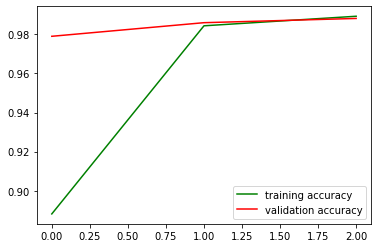

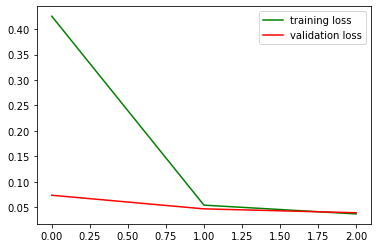

In [20]:
#Model Accuracy
accuracy = history.history["accuracy"]
loss = history.history["loss"]

val_accuracy = history.history["val_accuracy"]
val_loss = history.history["val_loss"]

plt.plot(accuracy,'g',label='training accuracy')
plt.plot(val_accuracy, 'r', label='validation accuracy')
plt.legend()
plt.show()


plt.plot(loss,'g',label='training loss')
plt.plot(val_loss, 'r', label='validation loss')
plt.legend()
plt.show()

In [21]:
# Demo test on one sample. 

i = 1213 # Some test sentence sample
p = model.predict(np.array([X_test[i]])) # Predict on it
p = np.argmax(p, axis=-1) # Map softmax back to a POS index
for i, (w, pred) in enumerate(zip(X_test[i], p[0])): # for every word in the sentence
    print("{:20} -- {}".format(words[w], tags[pred])) # Print word and tag
    if pred == 23 and p[0][i+1] == 23:
        break

But                  -- CC
the                  -- DT
pharmaceutical       -- JJ
company              -- NN
said                 -- VBD
it                   -- PRP
"                    -- ``
anticipates          -- VBZ
the                  -- DT
long-term            -- JJ
savings              -- NNS
resulting            -- VBG
from                 -- IN
the                  -- DT
plan                 -- NN
's                   -- POS
implementation       -- NN
will                 -- MD
more                 -- JJR
than                 -- IN
offset               -- JJ
short-term           -- JJ
costs                -- NNS
.                    -- .
"                    -- ``
dummy                -- .
dummy                -- .
dummy                -- .
dummy                -- .
dummy                -- .
dummy                -- .
dummy                -- .
dummy                -- .
dummy                -- .
dummy                -- .
dummy                -- .
dummy                -- .
dummy 

In [22]:
sentence = 'That was a nice jump'

sentence = word_tokenize(sentence)
X_Samp = pad_sequences(maxlen=max_len, sequences=[[word2id[word] for word in sentence]], padding="post", value=len(words)-1)

p = model.predict(np.array([X_Samp[0]])) # Predict on it
p = np.argmax(p, axis=-1) # Map softmax back to a POS index
for i, (w, pred) in enumerate(zip(X_Samp[0], p[0])): # for every word in the sentence
    print("{:20} -- {}".format(words[w], tags[pred])) # Print word and tag
    if pred == 23 and p[0][i+1] == 23:
        break

That                 -- DT
was                  -- VBD
a                    -- DT
nice                 -- JJ
jump                 -- NN
dummy                -- .
dummy                -- .
dummy                -- .
dummy                -- .
dummy                -- .
dummy                -- .
dummy                -- .
dummy                -- .
dummy                -- .
dummy                -- .
dummy                -- .
dummy                -- .
dummy                -- .
dummy                -- .
dummy                -- .
dummy                -- .
dummy                -- .
dummy                -- .
dummy                -- .
dummy                -- .
dummy                -- .
dummy                -- .
dummy                -- .
dummy                -- .
dummy                -- .
dummy                -- .
dummy                -- .
dummy                -- .
dummy                -- .
dummy                -- .
dummy                -- .
dummy                -- .
dummy                -- .
dummy 

In [23]:
sentence = 'Do you want to jump'

sentence = word_tokenize(sentence)
X_Samp = pad_sequences(maxlen=max_len, sequences=[[word2id[word] for word in sentence]], padding="post", value=len(words)-1)

p = model.predict(np.array([X_Samp[0]])) # Predict on it
p = np.argmax(p, axis=-1) # Map softmax back to a POS index
for i, (w, pred) in enumerate(zip(X_Samp[0], p[0])): # for every word in the sentence
    print("{:20} -- {}".format(words[w], tags[pred])) # Print word and tag
    if pred == 23 and p[0][i+1] == 23:
        break

Do                   -- VBP
you                  -- PRP
want                 -- VBP
to                   -- TO
jump                 -- VB
dummy                -- .
dummy                -- .
dummy                -- .
dummy                -- .
dummy                -- .
dummy                -- .
dummy                -- .
dummy                -- .
dummy                -- .
dummy                -- .
dummy                -- .
dummy                -- .
dummy                -- .
dummy                -- .
dummy                -- .
dummy                -- .
dummy                -- .
dummy                -- .
dummy                -- .
dummy                -- .
dummy                -- .
dummy                -- .
dummy                -- .
dummy                -- .
dummy                -- .
dummy                -- .
dummy                -- .
dummy                -- .
dummy                -- .
dummy                -- .
dummy                -- .
dummy                -- .
dummy                -- .
dumm

### Using glove

In [24]:
data.head()

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O


In [25]:
embeddings_index = {}
glovefile = open('../input/glove6b50dtxt/glove.6B.50d.txt','r',encoding='utf-8')
for line in tqdm(glovefile):
    values = line.split(" ")
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
#     coefs.shape
    embeddings_index[word] = coefs
glovefile.close()

print('Found %s word vectors.' % len(embeddings_index))

400000it [00:10, 37695.92it/s]

Found 400000 word vectors.


In [26]:
#creating embedding matrix for the words we have in the dataset
embedding_matrix = np.zeros((len(word2id), 50))
for word, index in tqdm(word2id.items()):
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

100%|██████████| 35179/35179 [00:00<00:00, 477606.97it/s]


In [27]:
model = Sequential([Embedding(input_dim=len(words), output_dim=50,weights = [embedding_matrix], input_length=X.shape[1]),
                    Dropout(0.1),
                    Bidirectional(LSTM(X.shape[1], return_sequences = True, recurrent_dropout=0.2)),
                    TimeDistributed(Dense(len(tags), activation="softmax"))])

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"]) # Compile with an optimizer

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 50)            1758950   
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 50)            0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 50, 100)           40400     
_________________________________________________________________
time_distributed_1 (TimeDist (None, 50, 42)            4242      
Total params: 1,803,592
Trainable params: 1,803,592
Non-trainable params: 0
_________________________________________________________________


In [29]:
# Train
history = model.fit(X_train, np.array(y_train), batch_size=32, epochs=3, validation_split=0.1, verbose=1) 

Epoch 1/3
1080/1080 [==============================] - 410s 376ms/step - loss: 0.6312 - accuracy: 0.8416 - val_loss: 0.0795 - val_accuracy: 0.9771
Epoch 2/3
1080/1080 [==============================] - 412s 381ms/step - loss: 0.0745 - accuracy: 0.9784 - val_loss: 0.0490 - val_accuracy: 0.9853
Epoch 3/3
1080/1080 [==============================] - 413s 382ms/step - loss: 0.0491 - accuracy: 0.9852 - val_loss: 0.0401 - val_accuracy: 0.9879


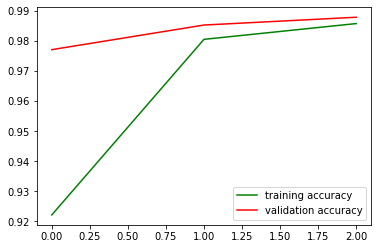

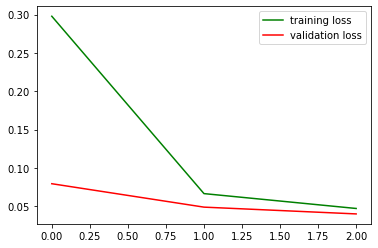

In [30]:
#Model Accuracy
accuracy = history.history["accuracy"]
loss = history.history["loss"]

val_accuracy = history.history["val_accuracy"]
val_loss = history.history["val_loss"]

plt.plot(accuracy,'g',label='training accuracy')
plt.plot(val_accuracy, 'r', label='validation accuracy')
plt.legend()
plt.show()


plt.plot(loss,'g',label='training loss')
plt.plot(val_loss, 'r', label='validation loss')
plt.legend()
plt.show()